In [1]:
library(raster)

Warning message:
"package 'raster' was built under R version 3.6.3"Loading required package: sp
Warning message:
"package 'sp' was built under R version 3.6.3"

In [4]:
setwd("D:/Proyectos_GitHub/curso_hidrologia")

In [5]:
suelo_hidrologico=raster('data/CNN/Tipo_de_Suelo_Hidrologico/Tipo_Suelo.tif')

Reclasificacion de los usos de suelo

In [9]:
m <- cbind(from = c(-Inf, 5,11,12,13,14,16 ), to = c(5,11,12,13,14,16,17), becomes = c(3,5,4,2,4,5,1))
LU=raster('data/CNN/Uso_de_suelos/Uso_suelos.tif')
LU_reclass=reclassify(LU,m)

Igualando las resoluciones espaciales de ambos rasters

In [ ]:
LU_reclass=resample(LU_reclass,suelo_hidrologico,method='ngb')

In [12]:
mat=read.csv('data/CNN/CN_Table.csv',sep = ';')
mat

ï..A,B,C,D
100,100,100,100
57,72,81,86
30,58,71,78
67,77,83,87
62,71,78,81


In [18]:
CN=function(x,y){ 
   if (y==0){
     result=0
   }else{
     result=mat[x,y]
   }
   result
}

In [21]:
DF_hidro=as.data.frame(rasterToPoints(suelo_hidrologico))
DF_Uso=as.data.frame(rasterToPoints(LU_reclass))

In [22]:
df_2r=data.frame(cbind(DF_Uso$Uso_suelos,DF_hidro$Tipo_Suelo))
names(df_2r)=c('x','y')

In [23]:
results=mapply(CN,df_2r$x,df_2r$y)

In [24]:
CN=LU_reclass
values(CN)=results

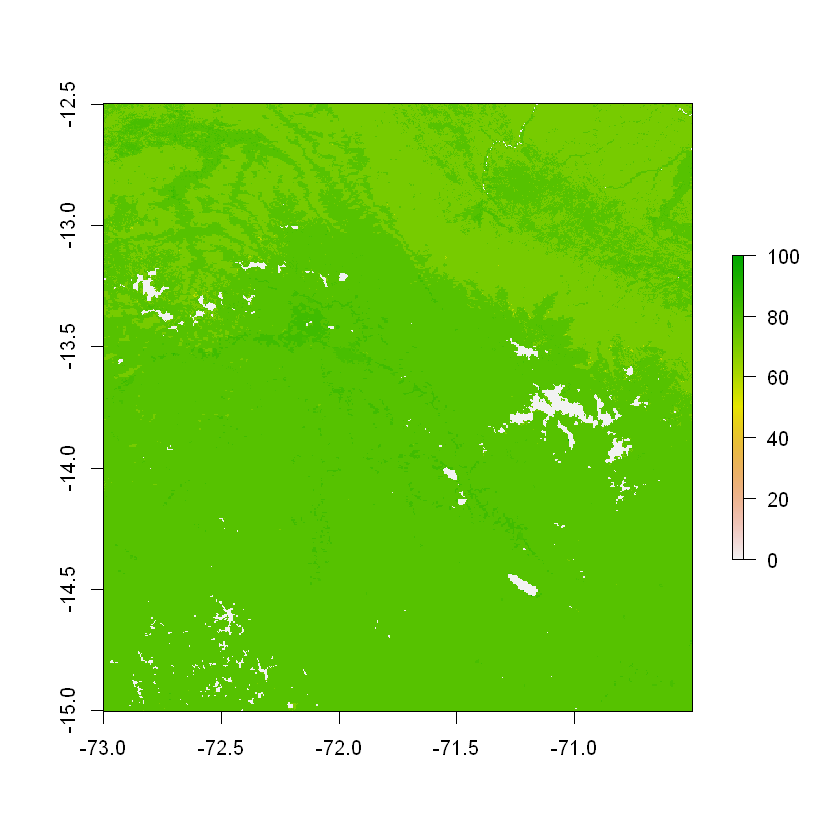

In [25]:
plot(CN)